# Phase Kickback

In [65]:
from qiskit import *
from qiskit.visualization import *
from matplotlib import style
from qiskit.extensions import Initialize
from math import pi
style.use('dark_background')

Let’s put the target qubit in the state  |−⟩ , so it has a negative phase:

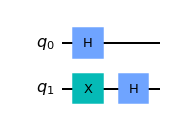

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
# qc.barrier()
# qc.cx(0,1)
qc.draw('mpl')

This creates states:<br>
|−+⟩=1/2(|00⟩+|01⟩−|10⟩−|11⟩)

In [18]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
statevec

array([ 0.5-6.123234e-17j,  0.5-6.123234e-17j, -0.5+6.123234e-17j,
       -0.5+6.123234e-17j])

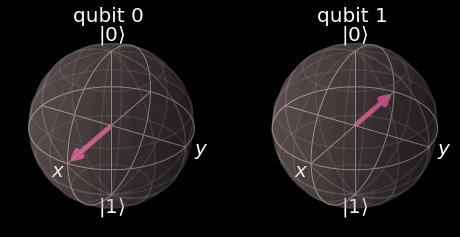

In [19]:
plot_bloch_multivector(statevec)

If the CNOT acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11\rangle$, resulting in the state:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$


This is interesting, because it affects the state of the _control_ qubit while leaving the state of the _target_ qubit unchanged. 


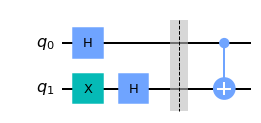

In [21]:
qc.barrier()
qc.cx(0,1)
qc.draw('mpl')

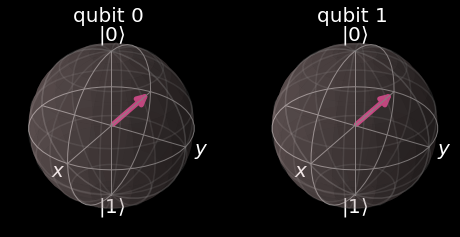

In [22]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(statevec)

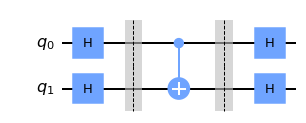

In [31]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.draw('mpl')

In [32]:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary1 = execute(qc,unitary_backend).result().get_unitary()
unitary1

array([[ 1.00000000e+00-1.22464680e-16j, -3.25176795e-17+6.12323400e-17j,
        -3.59949720e-33-2.35183302e-33j, -3.58404070e-17+6.12323400e-17j],
       [-3.25176795e-17+6.12323400e-17j,  1.00000000e+00-2.44929360e-16j,
        -3.58404070e-17+6.12323400e-17j, -2.69695029e-33-2.35183302e-33j],
       [-3.58404070e-17+6.12323400e-17j, -3.59949720e-33-2.35183302e-33j,
        -3.25176795e-17+6.12323400e-17j,  1.00000000e+00-3.67394040e-16j],
       [-2.32310312e-33-2.35183302e-33j, -3.58404070e-17+6.12323400e-17j,
         1.00000000e+00-2.44929360e-16j, -3.25176795e-17+6.12323400e-17j]])

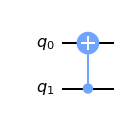

In [33]:
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.draw('mpl')

In [34]:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
unitary

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

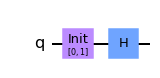

In [47]:
qc = QuantumCircuit(1)
initial_state=[0, 1] # Sum of the amplitudes must be 1 as it is a pdf
initializer = Initialize(initial_state)
initializer.label = 'init'
qc.append(initializer, [0])
qc.h(0)
qc.draw('mpl')

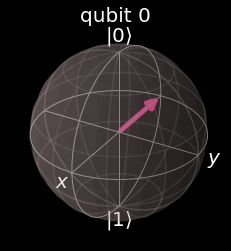

In [48]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(statevec)

In [49]:
statevec

array([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j])

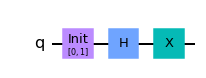

In [50]:
qc.x(0)
qc.draw('mpl')

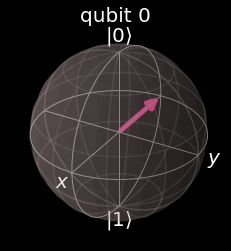

In [51]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(statevec)

In [52]:
statevec

array([-0.70710678+8.65956056e-17j,  0.70710678-8.65956056e-17j])

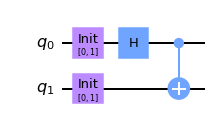

In [57]:
qc = QuantumCircuit(2)

initial_state=[0, 1] # Sum of the amplitudes must be 1 as it is a pdf
initializer = Initialize(initial_state)
initializer.label = 'init'
qc.append(initializer, [0])
qc.h(0)

qc.append(initializer, [1])
qc.cx(0,1)
qc.draw('mpl')

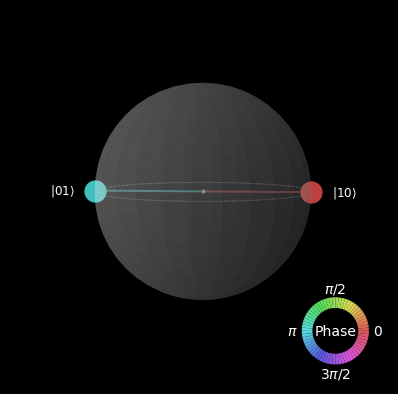

In [59]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
plot_state_qsphere(statevec)

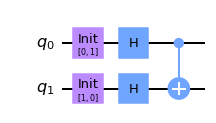

In [61]:
qc = QuantumCircuit(2)

initial_state=[0, 1] # Sum of the amplitudes must be 1 as it is a pdf
initializer = Initialize(initial_state)
initializer.label = 'init'
qc.append(initializer, [0])
qc.h(0)

initial_state=[1, 0] # Sum of the amplitudes must be 1 as it is a pdf
initializer = Initialize(initial_state)
initializer.label = 'init'
qc.append(initializer, [1])
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

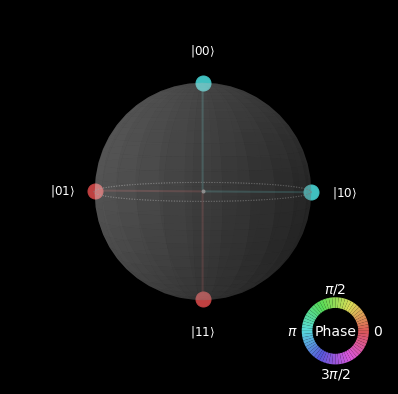

In [62]:
backend = Aer.get_backend('statevector_simulator')
statevec = execute(qc, backend).result().get_statevector()
plot_state_qsphere(statevec)

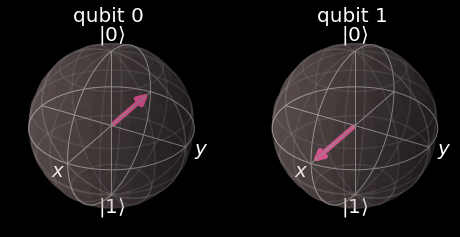

In [63]:
plot_bloch_multivector(statevec)

## Kickback with T-gate

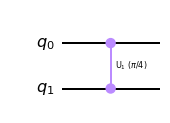

In [67]:
qc = QuantumCircuit(2)
qc.cu1(pi/4, 0, 1)
qc.draw('mpl')

In [68]:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()
unitary

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 1.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        1.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.70710678+0.70710678j]])

## Effect of controlled T-gate

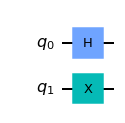

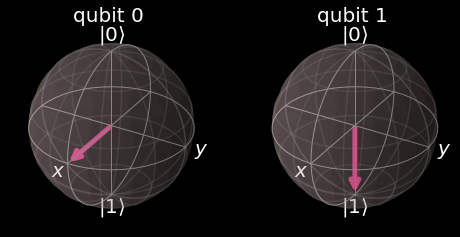

In [76]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
#Draw ckt
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(final_state)

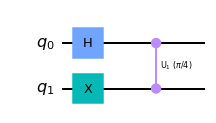

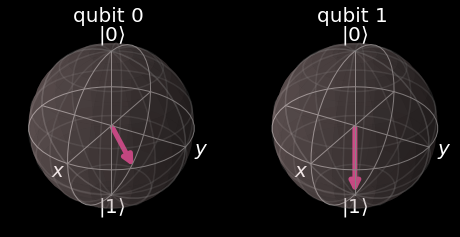

In [77]:

# Add Controlled-T
qc.cu1(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(final_state)

## Exercises:<br>
What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state  |0⟩ ? (as shown in the circuit below)? Use Qiskit to check your answer.

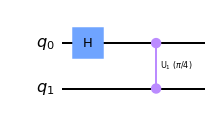

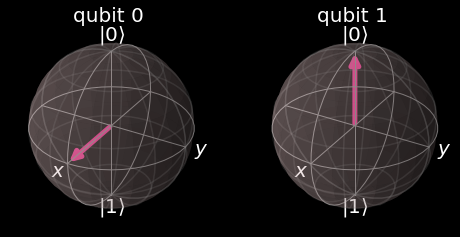

In [78]:
qc = QuantumCircuit(2)
qc.h(0)

# Add Controlled-T
qc.cu1(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(final_state)

What would happen to the control qubit (q0) if the if the target qubit (q1) was in the state  |1⟩ , and the circuit used a controlled-Sdg gate instead of the controlled-T?

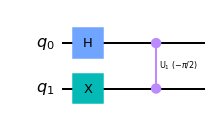

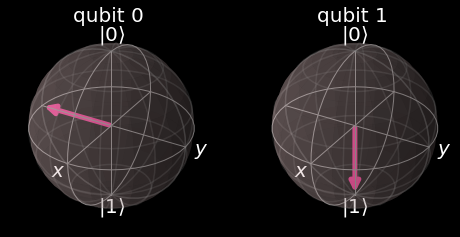

In [79]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)

# Add Controlled-T
qc.cu1(-pi/2, 0, 1)
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(final_state)

What would happen to the control qubit (q0) if it was in the state  |1⟩  instead of the state  |+⟩  before application of the controlled-T ?

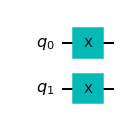

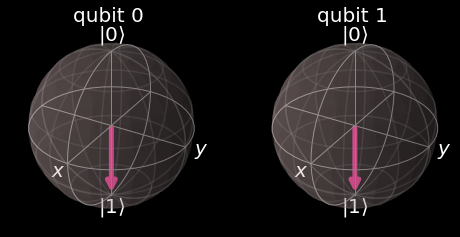

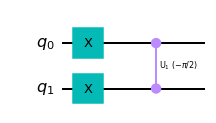

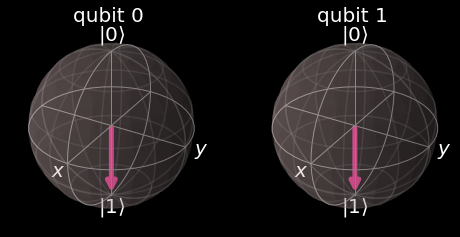

In [81]:
qc = QuantumCircuit(2)
qc.x(1)
qc.x(0)
#Draw
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
display(plot_bloch_multivector(final_state))
# Add Controlled-T
qc.cu1(-pi/2, 0, 1)
display(qc.draw('mpl'))
# See Results:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(final_state)